<a href="https://colab.research.google.com/github/coldjoke123/python1/blob/master/HW_NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.utils import np_utils

Using TensorFlow backend.


## 載入資料並且重新調整資料的樣子

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(60000,784)
x_test = x_test.reshape(10000,784)
y_train = np_utils.to_categorical(y_train,10)
y_test = np_utils.to_categorical(y_test,10)

11493376/11490434 [==============================] - 1s 0us/step


## 將老師上課的模型匯入

In [0]:
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import SGD

In [7]:
model_old = Sequential()
model_old.add(Dense(4, input_dim = 784))
model_old.add(Activation('sigmoid'))
model_old.add(Dense(2))
model_old.add(Activation('sigmoid'))
model_old.add(Dense(10))
model_old.add(Activation('softmax'))
model_old.compile(loss = 'mse', optimizer=SGD(lr = 0.087), metrics=['accuracy'])
model_old.summary()

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 4)                 3140      
_________________________________________________________________
activation_1 (Activation)    (None, 4)                 0         
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 10        
_________________________________________________________________
activation_2 (Activation)    (None, 2)                 0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                30        
_________________________________________________________________
activation_3 (Activation)    (None, 10)                0         
Total params: 3,180
Trainable params: 3,180
Non-trainable params: 0
__

In [8]:
model_old_20 = model_old.fit(x_train, y_train, 
                         batch_size=100, 
                         epochs=20,
                         verbose=1,
                         validation_data=(x_test, y_test))

Instructions for updating:
Use tf.cast instead.
Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 2s 29us/step - loss: 0.0910 - acc: 0.0961 - val_loss: 0.0905 - val_acc: 0.1048
Epoch 2/20
60000/60000 [==============================] - 1s 22us/step - loss: 0.0903 - acc: 0.1045 - val_loss: 0.0901 - val_acc: 0.1130
Epoch 3/20
60000/60000 [==============================] - 1s 19us/step - loss: 0.0901 - acc: 0.1089 - val_loss: 0.0899 - val_acc: 0.1152
Epoch 4/20
60000/60000 [==============================] - 1s 19us/step - loss: 0.0899 - acc: 0.1131 - val_loss: 0.0898 - val_acc: 0.1197
Epoch 5/20
60000/60000 [==============================] - 1s 18us/step - loss: 0.0897 - acc: 0.1176 - val_loss: 0.0896 - val_acc: 0.1221
Epoch 6/20
60000/60000 [==============================] - 1s 19us/step - loss: 0.0896 - acc: 0.1204 - val_loss: 0.0895 - val_acc: 0.1246
Epoch 7/20
60000/60000 [==============================] - 1s 19us/step - loss: 0

## 對資料做正規化，將資料調整至 $[0,1]$ 區間

降低資料受到極值的影響

In [0]:
x_train_reg = (x_train - x_train.min())/(x_train.max() - x_train.min())
x_test_reg = (x_test - x_test.min())/(x_test.max() - x_test.min())

## 首先，我們增加神經元的個數至每層100個，其餘參數不變

In [10]:
model_test1 = Sequential()
model_test1.add(Dense(100, input_dim = 784))
model_test1.add(Activation('sigmoid'))
model_test1.add(Dense(100))
model_test1.add(Activation('sigmoid'))
model_test1.add(Dense(10))
model_test1.add(Activation('softmax'))
model_test1.compile(loss = 'mse', optimizer=SGD(lr = 0.087), metrics=['accuracy'])
model_test1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 100)               78500     
_________________________________________________________________
activation_4 (Activation)    (None, 100)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 100)               10100     
_________________________________________________________________
activation_5 (Activation)    (None, 100)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 10)                1010      
_________________________________________________________________
activation_6 (Activation)    (None, 10)                0         
Total params: 89,610
Trainable params: 89,610
Non-trainable params: 0
_________________________________________________________________


In [11]:
model_test1_20 = model_test1.fit(x_train_reg, y_train, 
                         batch_size=100, 
                         epochs=20,
                         verbose=1,
                         validation_data=(x_test_reg, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 2s 41us/step - loss: 0.0908 - acc: 0.1183 - val_loss: 0.0898 - val_acc: 0.1163
Epoch 2/20
60000/60000 [==============================] - 2s 38us/step - loss: 0.0897 - acc: 0.1158 - val_loss: 0.0895 - val_acc: 0.1163
Epoch 3/20
60000/60000 [==============================] - 2s 36us/step - loss: 0.0895 - acc: 0.1204 - val_loss: 0.0893 - val_acc: 0.1166
Epoch 4/20
60000/60000 [==============================] - 2s 38us/step - loss: 0.0893 - acc: 0.1221 - val_loss: 0.0891 - val_acc: 0.1448
Epoch 5/20
60000/60000 [==============================] - 2s 37us/step - loss: 0.0891 - acc: 0.1357 - val_loss: 0.0889 - val_acc: 0.2282
Epoch 6/20
60000/60000 [==============================] - 2s 38us/step - loss: 0.0888 - acc: 0.1897 - val_loss: 0.0887 - val_acc: 0.1703
Epoch 7/20
60000/60000 [==============================] - 2s 37us/step - loss: 0.0886 - acc: 0.1856 - val_loss: 0.0884 - val_acc

In [12]:
score = model_test1.evaluate(x_test_reg, y_test)
print('loss:', score[0])
print('accuracy:', score[1])

10000/10000 [==============================] - 0s 32us/step
loss: 0.07663173376321793
accuracy: 0.4584


## 相較於老師上課的模型，可以發現增加神經元數是能增加準確率的！

## 於是，在Hidden layer有兩層activation function是sigmoid，loss function是mse，optimizer是SGD的條件下，測試神經元的個數以50個為單位從100到800來尋找準確率最高的組合。

In [0]:
def seek_opt(n):
    seek_accu = np.zeros((2*(n-1),n-1))
    for i in range(1,n):
        for j in range(1,n):
            model = Sequential()
            model.add(Dense(50*(i+1), input_dim = 784))
            model.add(Activation('sigmoid'))
            model.add(Dense(50*(j+1)))
            model.add(Activation('sigmoid'))
            model.add(Dense(10))
            model.add(Activation('softmax'))
            model.compile(loss = 'mse', optimizer=SGD(lr = 0.087), metrics=['accuracy'])
            score = model.evaluate(x_test_reg, y_test)
            seek_accu[i-1,j-1] = score[1]
            seek_accu[i-1+(n-1),j-1] = score[0]
    return seek_accu

In [14]:
seek_accu = seek_opt(16)
accu = seek_accu[:16,:]
loss = seek_accu[16:,:]

10000/10000 [==============================] - 4s 415us/step


In [21]:
opt_acc_value = accu.max()
opt_acc_index = accu.argmax()

model_best = Sequential()
model_best.add(Dense(50*((opt_acc_index//15)+2), input_dim = 784))
model_best.add(Activation('sigmoid'))
model_best.add(Dense(50*((opt_acc_index%15)+2)))
model_best.add(Activation('sigmoid'))
model_best.add(Dense(10))
model_best.add(Activation('softmax'))
model_best.compile(loss = 'mse', optimizer=SGD(lr = 0.087), metrics=['accuracy'])
model_best.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_685 (Dense)            (None, 650)               510250    
_________________________________________________________________
activation_685 (Activation)  (None, 650)               0         
_________________________________________________________________
dense_686 (Dense)            (None, 350)               227850    
_________________________________________________________________
activation_686 (Activation)  (None, 350)               0         
_________________________________________________________________
dense_687 (Dense)            (None, 10)                3510      
_________________________________________________________________
activation_687 (Activation)  (None, 10)                0         
Total params: 741,610
Trainable params: 741,610
Non-trainable params: 0
_________________________________________________________________


In [16]:
model_best_20 = model_best.fit(x_train_reg, y_train,
                         batch_size = 100,
                         epochs = 20,
                         verbose = 1,
                         validation_data = (x_test_reg, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 12s 207us/step - loss: 0.0901 - acc: 0.1229 - val_loss: 0.0896 - val_acc: 0.1147
Epoch 2/20
60000/60000 [==============================] - 9s 155us/step - loss: 0.0894 - acc: 0.1574 - val_loss: 0.0891 - val_acc: 0.1234
Epoch 3/20
60000/60000 [==============================] - 9s 155us/step - loss: 0.0889 - acc: 0.1943 - val_loss: 0.0887 - val_acc: 0.1836
Epoch 4/20
60000/60000 [==============================] - 9s 153us/step - loss: 0.0885 - acc: 0.2346 - val_loss: 0.0881 - val_acc: 0.2734
Epoch 5/20
60000/60000 [==============================] - 10s 159us/step - loss: 0.0879 - acc: 0.2734 - val_loss: 0.0876 - val_acc: 0.2883
Epoch 6/20
60000/60000 [==============================] - 9s 155us/step - loss: 0.0873 - acc: 0.2867 - val_loss: 0.0869 - val_acc: 0.2890
Epoch 7/20
60000/60000 [==============================] - 9s 155us/step - loss: 0.0865 - acc: 0.2939 - val_loss: 0.0860 

## 由以上結果可知，在兩層hidden layer給定activation function是sigmoid，loss function是mse，optimizer是SGD的條件下，神經元個數分別為650跟350會有最高的準確率！

## 換句話說，並非神經元個數越多越好！！
## 比較新的模型與老師上課的模型

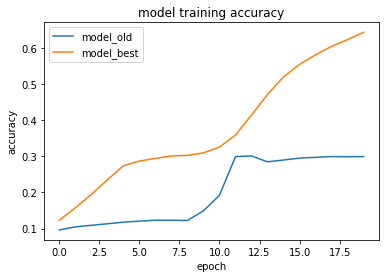

In [17]:
plt.plot(model_old_20.history["acc"])
plt.plot(model_best_20.history["acc"])
         
plt.title("model training accuracy")
plt.ylabel("accuracy")
plt.xlabel("epoch")
plt.legend(["model_old","model_best"], loc = 'best')
plt.show()

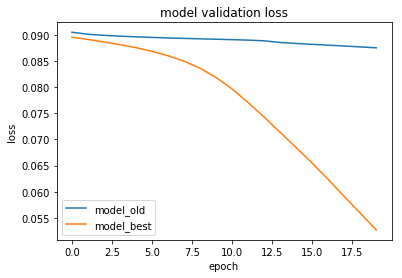

In [18]:
plt.plot(model_old_20.history["val_loss"])
plt.plot(model_best_20.history["val_loss"])
         
plt.title("model validation loss")
plt.ylabel("loss")
plt.xlabel("epoch")
plt.legend(["model_old","model_best"], loc = 'best')
plt.show()

# 在這個參數的基礎下去選擇不同的loss function 與activation function做測試

## 嘗試的Activation function: sigmoid, tanh, elu, relu

## 和loss function: mse, binary_crossentropy, categorical_crossentropy

## 以窮舉法的方式嘗試

*第二層輸出一律採用softmax

In [22]:
model_s_t_m = Sequential()
model_s_t_m.add(Dense(650, input_dim = 784))
model_s_t_m.add(Activation('sigmoid'))
model_s_t_m.add(Dense(350))
model_s_t_m.add(Activation('tanh'))
model_s_t_m.add(Dense(10))
model_s_t_m.add(Activation('softmax'))
model_s_t_m.compile(loss = 'mse', optimizer=SGD(lr = 0.087), metrics=['accuracy'])
model_s_t_m.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_688 (Dense)            (None, 650)               510250    
_________________________________________________________________
activation_688 (Activation)  (None, 650)               0         
_________________________________________________________________
dense_689 (Dense)            (None, 350)               227850    
_________________________________________________________________
activation_689 (Activation)  (None, 350)               0         
_________________________________________________________________
dense_690 (Dense)            (None, 10)                3510      
_________________________________________________________________
activation_690 (Activation)  (None, 10)                0         
Total params: 741,610
Trainable params: 741,610
Non-trainable params: 0
_________________________________________________________________


In [23]:
model_s_t_m_20 = model_s_t_m.fit(x_train_reg, y_train,
                         batch_size = 100,
                         epochs = 20,
                         verbose = 1,
                         validation_data = (x_test_reg, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 14s 228us/step - loss: 0.0876 - acc: 0.2796 - val_loss: 0.0838 - val_acc: 0.3481
Epoch 2/20
60000/60000 [==============================] - 10s 168us/step - loss: 0.0778 - acc: 0.4464 - val_loss: 0.0704 - val_acc: 0.5268
Epoch 3/20
60000/60000 [==============================] - 10s 168us/step - loss: 0.0631 - acc: 0.6130 - val_loss: 0.0552 - val_acc: 0.6939
Epoch 4/20
60000/60000 [==============================] - 10s 166us/step - loss: 0.0493 - acc: 0.7210 - val_loss: 0.0429 - val_acc: 0.7730
Epoch 5/20
60000/60000 [==============================] - 10s 167us/step - loss: 0.0391 - acc: 0.7958 - val_loss: 0.0343 - val_acc: 0.8383
Epoch 6/20
60000/60000 [==============================] - 10s 170us/step - loss: 0.0321 - acc: 0.8395 - val_loss: 0.0286 - val_acc: 0.8586
Epoch 7/20
60000/60000 [==============================] - 10s 159us/step - loss: 0.0276 - acc: 0.8582 - val_loss: 0.

In [24]:
model_s_e_m = Sequential()
model_s_e_m.add(Dense(650, input_dim = 784))
model_s_e_m.add(Activation('sigmoid'))
model_s_e_m.add(Dense(350))
model_s_e_m.add(Activation('elu'))
model_s_e_m.add(Dense(10))
model_s_e_m.add(Activation('softmax'))
model_s_e_m.compile(loss = 'mse', optimizer=SGD(lr = 0.087), metrics=['accuracy'])
model_s_e_m.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_691 (Dense)            (None, 650)               510250    
_________________________________________________________________
activation_691 (Activation)  (None, 650)               0         
_________________________________________________________________
dense_692 (Dense)            (None, 350)               227850    
_________________________________________________________________
activation_692 (Activation)  (None, 350)               0         
_________________________________________________________________
dense_693 (Dense)            (None, 10)                3510      
_________________________________________________________________
activation_693 (Activation)  (None, 10)                0         
Total params: 741,610
Trainable params: 741,610
Non-trainable params: 0
_________________________________________________________________


In [25]:
model_s_e_m_20 = model_s_e_m.fit(x_train_reg, y_train,
                         batch_size = 100,
                         epochs = 20,
                         verbose = 1,
                         validation_data = (x_test_reg, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 13s 217us/step - loss: 0.0866 - acc: 0.3562 - val_loss: 0.0821 - val_acc: 0.4496
Epoch 2/20
60000/60000 [==============================] - 10s 160us/step - loss: 0.0754 - acc: 0.4962 - val_loss: 0.0676 - val_acc: 0.5664
Epoch 3/20
60000/60000 [==============================] - 10s 160us/step - loss: 0.0600 - acc: 0.6225 - val_loss: 0.0523 - val_acc: 0.6926
Epoch 4/20
60000/60000 [==============================] - 9s 158us/step - loss: 0.0470 - acc: 0.7256 - val_loss: 0.0412 - val_acc: 0.7852
Epoch 5/20
60000/60000 [==============================] - 9s 158us/step - loss: 0.0378 - acc: 0.8032 - val_loss: 0.0334 - val_acc: 0.8335
Epoch 6/20
60000/60000 [==============================] - 10s 172us/step - loss: 0.0314 - acc: 0.8386 - val_loss: 0.0282 - val_acc: 0.8554
Epoch 7/20
60000/60000 [==============================] - 10s 159us/step - loss: 0.0272 - acc: 0.8548 - val_loss: 0.02

In [26]:
model_s_r_m = Sequential()
model_s_r_m.add(Dense(650, input_dim = 784))
model_s_r_m.add(Activation('sigmoid'))
model_s_r_m.add(Dense(350))
model_s_r_m.add(Activation('relu'))
model_s_r_m.add(Dense(10))
model_s_r_m.add(Activation('softmax'))
model_s_r_m.compile(loss = 'mse', optimizer=SGD(lr = 0.087), metrics=['accuracy'])
model_s_r_m.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_694 (Dense)            (None, 650)               510250    
_________________________________________________________________
activation_694 (Activation)  (None, 650)               0         
_________________________________________________________________
dense_695 (Dense)            (None, 350)               227850    
_________________________________________________________________
activation_695 (Activation)  (None, 350)               0         
_________________________________________________________________
dense_696 (Dense)            (None, 10)                3510      
_________________________________________________________________
activation_696 (Activation)  (None, 10)                0         
Total params: 741,610
Trainable params: 741,610
Non-trainable params: 0
_________________________________________________________________


In [27]:
model_s_r_m_20 = model_s_r_m.fit(x_train_reg, y_train,
                         batch_size = 100,
                         epochs = 20,
                         verbose = 1,
                         validation_data = (x_test_reg, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 14s 225us/step - loss: 0.0877 - acc: 0.2999 - val_loss: 0.0850 - val_acc: 0.3591
Epoch 2/20
60000/60000 [==============================] - 10s 162us/step - loss: 0.0810 - acc: 0.3892 - val_loss: 0.0761 - val_acc: 0.4513
Epoch 3/20
60000/60000 [==============================] - 10s 159us/step - loss: 0.0706 - acc: 0.5125 - val_loss: 0.0644 - val_acc: 0.5896
Epoch 4/20
60000/60000 [==============================] - 10s 161us/step - loss: 0.0586 - acc: 0.6488 - val_loss: 0.0523 - val_acc: 0.7039
Epoch 5/20
60000/60000 [==============================] - 10s 161us/step - loss: 0.0476 - acc: 0.7377 - val_loss: 0.0423 - val_acc: 0.7813
Epoch 6/20
60000/60000 [==============================] - 10s 161us/step - loss: 0.0389 - acc: 0.7988 - val_loss: 0.0348 - val_acc: 0.8285
Epoch 7/20
60000/60000 [==============================] - 10s 163us/step - loss: 0.0326 - acc: 0.8351 - val_loss: 0.

In [28]:
model_t_t_m = Sequential()
model_t_t_m.add(Dense(650, input_dim = 784))
model_t_t_m.add(Activation('tanh'))
model_t_t_m.add(Dense(350))
model_t_t_m.add(Activation('tanh'))
model_t_t_m.add(Dense(10))
model_t_t_m.add(Activation('softmax'))
model_t_t_m.compile(loss = 'mse', optimizer=SGD(lr = 0.087), metrics=['accuracy'])
model_t_t_m.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_697 (Dense)            (None, 650)               510250    
_________________________________________________________________
activation_697 (Activation)  (None, 650)               0         
_________________________________________________________________
dense_698 (Dense)            (None, 350)               227850    
_________________________________________________________________
activation_698 (Activation)  (None, 350)               0         
_________________________________________________________________
dense_699 (Dense)            (None, 10)                3510      
_________________________________________________________________
activation_699 (Activation)  (None, 10)                0         
Total params: 741,610
Trainable params: 741,610
Non-trainable params: 0
_________________________________________________________________


In [29]:
model_t_t_m_20 = model_t_t_m.fit(x_train_reg, y_train,
                         batch_size = 100,
                         epochs = 20,
                         verbose = 1,
                         validation_data = (x_test_reg, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 13s 216us/step - loss: 0.0495 - acc: 0.6879 - val_loss: 0.0272 - val_acc: 0.8539
Epoch 2/20
60000/60000 [==============================] - 10s 159us/step - loss: 0.0236 - acc: 0.8659 - val_loss: 0.0197 - val_acc: 0.8869
Epoch 3/20
60000/60000 [==============================] - 10s 160us/step - loss: 0.0191 - acc: 0.8845 - val_loss: 0.0171 - val_acc: 0.8999
Epoch 4/20
60000/60000 [==============================] - 10s 158us/step - loss: 0.0172 - acc: 0.8936 - val_loss: 0.0157 - val_acc: 0.9042
Epoch 5/20
60000/60000 [==============================] - 10s 161us/step - loss: 0.0160 - acc: 0.8995 - val_loss: 0.0149 - val_acc: 0.9067
Epoch 6/20
60000/60000 [==============================] - 10s 165us/step - loss: 0.0152 - acc: 0.9039 - val_loss: 0.0142 - val_acc: 0.9107
Epoch 7/20
60000/60000 [==============================] - 10s 159us/step - loss: 0.0145 - acc: 0.9079 - val_loss: 0.

In [30]:
model_t_e_m = Sequential()
model_t_e_m.add(Dense(650, input_dim = 784))
model_t_e_m.add(Activation('tanh'))
model_t_e_m.add(Dense(350))
model_t_e_m.add(Activation('elu'))
model_t_e_m.add(Dense(10))
model_t_e_m.add(Activation('softmax'))
model_t_e_m.compile(loss = 'mse', optimizer=SGD(lr = 0.087), metrics=['accuracy'])
model_t_e_m.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_700 (Dense)            (None, 650)               510250    
_________________________________________________________________
activation_700 (Activation)  (None, 650)               0         
_________________________________________________________________
dense_701 (Dense)            (None, 350)               227850    
_________________________________________________________________
activation_701 (Activation)  (None, 350)               0         
_________________________________________________________________
dense_702 (Dense)            (None, 10)                3510      
_________________________________________________________________
activation_702 (Activation)  (None, 10)                0         
Total params: 741,610
Trainable params: 741,610
Non-trainable params: 0
_________________________________________________________________


In [31]:
model_t_e_m_20 = model_t_e_m.fit(x_train_reg, y_train,
                         batch_size = 100,
                         epochs = 20,
                         verbose = 1,
                         validation_data = (x_test_reg, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 13s 218us/step - loss: 0.0496 - acc: 0.6823 - val_loss: 0.0266 - val_acc: 0.8603
Epoch 2/20
60000/60000 [==============================] - 10s 162us/step - loss: 0.0230 - acc: 0.8712 - val_loss: 0.0190 - val_acc: 0.8900
Epoch 3/20
60000/60000 [==============================] - 10s 162us/step - loss: 0.0186 - acc: 0.8887 - val_loss: 0.0165 - val_acc: 0.9002
Epoch 4/20
60000/60000 [==============================] - 10s 162us/step - loss: 0.0167 - acc: 0.8975 - val_loss: 0.0152 - val_acc: 0.9062
Epoch 5/20
60000/60000 [==============================] - 10s 162us/step - loss: 0.0156 - acc: 0.9028 - val_loss: 0.0144 - val_acc: 0.9085
Epoch 6/20
60000/60000 [==============================] - 10s 174us/step - loss: 0.0148 - acc: 0.9064 - val_loss: 0.0138 - val_acc: 0.9122
Epoch 7/20
60000/60000 [==============================] - 10s 162us/step - loss: 0.0143 - acc: 0.9100 - val_loss: 0.

In [32]:
model_t_r_m = Sequential()
model_t_r_m.add(Dense(650, input_dim = 784))
model_t_r_m.add(Activation('tanh'))
model_t_r_m.add(Dense(350))
model_t_r_m.add(Activation('relu'))
model_t_r_m.add(Dense(10))
model_t_r_m.add(Activation('softmax'))
model_t_r_m.compile(loss = 'mse', optimizer=SGD(lr = 0.087), metrics=['accuracy'])
model_t_r_m.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_703 (Dense)            (None, 650)               510250    
_________________________________________________________________
activation_703 (Activation)  (None, 650)               0         
_________________________________________________________________
dense_704 (Dense)            (None, 350)               227850    
_________________________________________________________________
activation_704 (Activation)  (None, 350)               0         
_________________________________________________________________
dense_705 (Dense)            (None, 10)                3510      
_________________________________________________________________
activation_705 (Activation)  (None, 10)                0         
Total params: 741,610
Trainable params: 741,610
Non-trainable params: 0
_________________________________________________________________


In [33]:
model_t_r_m_20 = model_t_r_m.fit(x_train_reg, y_train,
                         batch_size = 100,
                         epochs = 20,
                         verbose = 1,
                         validation_data = (x_test_reg, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 13s 220us/step - loss: 0.0596 - acc: 0.6333 - val_loss: 0.0345 - val_acc: 0.8051
Epoch 2/20
60000/60000 [==============================] - 10s 163us/step - loss: 0.0272 - acc: 0.8495 - val_loss: 0.0211 - val_acc: 0.8833
Epoch 3/20
60000/60000 [==============================] - 10s 160us/step - loss: 0.0201 - acc: 0.8818 - val_loss: 0.0174 - val_acc: 0.8995
Epoch 4/20
60000/60000 [==============================] - 10s 162us/step - loss: 0.0173 - acc: 0.8951 - val_loss: 0.0155 - val_acc: 0.9083
Epoch 5/20
60000/60000 [==============================] - 10s 160us/step - loss: 0.0157 - acc: 0.9032 - val_loss: 0.0143 - val_acc: 0.9131
Epoch 6/20
60000/60000 [==============================] - 10s 160us/step - loss: 0.0147 - acc: 0.9088 - val_loss: 0.0135 - val_acc: 0.9176
Epoch 7/20
60000/60000 [==============================] - 10s 161us/step - loss: 0.0139 - acc: 0.9134 - val_loss: 0.

In [34]:
model_e_e_m = Sequential()
model_e_e_m.add(Dense(650, input_dim = 784))
model_e_e_m.add(Activation('elu'))
model_e_e_m.add(Dense(350))
model_e_e_m.add(Activation('elu'))
model_e_e_m.add(Dense(10))
model_e_e_m.add(Activation('softmax'))
model_e_e_m.compile(loss = 'mse', optimizer=SGD(lr = 0.087), metrics=['accuracy'])
model_e_e_m.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_706 (Dense)            (None, 650)               510250    
_________________________________________________________________
activation_706 (Activation)  (None, 650)               0         
_________________________________________________________________
dense_707 (Dense)            (None, 350)               227850    
_________________________________________________________________
activation_707 (Activation)  (None, 350)               0         
_________________________________________________________________
dense_708 (Dense)            (None, 10)                3510      
_________________________________________________________________
activation_708 (Activation)  (None, 10)                0         
Total params: 741,610
Trainable params: 741,610
Non-trainable params: 0
_________________________________________________________________


In [35]:
model_e_e_m_20 = model_e_e_m.fit(x_train_reg, y_train,
                         batch_size = 100,
                         epochs = 20,
                         verbose = 1,
                         validation_data = (x_test_reg, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 13s 220us/step - loss: 0.0501 - acc: 0.6820 - val_loss: 0.0271 - val_acc: 0.8565
Epoch 2/20
60000/60000 [==============================] - 10s 159us/step - loss: 0.0233 - acc: 0.8671 - val_loss: 0.0192 - val_acc: 0.8885
Epoch 3/20
60000/60000 [==============================] - 9s 158us/step - loss: 0.0188 - acc: 0.8868 - val_loss: 0.0166 - val_acc: 0.8992
Epoch 4/20
60000/60000 [==============================] - 9s 157us/step - loss: 0.0168 - acc: 0.8964 - val_loss: 0.0153 - val_acc: 0.9043
Epoch 5/20
60000/60000 [==============================] - 9s 157us/step - loss: 0.0156 - acc: 0.9027 - val_loss: 0.0144 - val_acc: 0.9090
Epoch 6/20
60000/60000 [==============================] - 10s 160us/step - loss: 0.0148 - acc: 0.9067 - val_loss: 0.0138 - val_acc: 0.9121
Epoch 7/20
60000/60000 [==============================] - 10s 163us/step - loss: 0.0143 - acc: 0.9100 - val_loss: 0.013

In [36]:
model_e_r_m = Sequential()
model_e_r_m.add(Dense(650, input_dim = 784))
model_e_r_m.add(Activation('elu'))
model_e_r_m.add(Dense(350))
model_e_r_m.add(Activation('relu'))
model_e_r_m.add(Dense(10))
model_e_r_m.add(Activation('softmax'))
model_e_r_m.compile(loss = 'mse', optimizer=SGD(lr = 0.087), metrics=['accuracy'])
model_e_r_m.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_709 (Dense)            (None, 650)               510250    
_________________________________________________________________
activation_709 (Activation)  (None, 650)               0         
_________________________________________________________________
dense_710 (Dense)            (None, 350)               227850    
_________________________________________________________________
activation_710 (Activation)  (None, 350)               0         
_________________________________________________________________
dense_711 (Dense)            (None, 10)                3510      
_________________________________________________________________
activation_711 (Activation)  (None, 10)                0         
Total params: 741,610
Trainable params: 741,610
Non-trainable params: 0
_________________________________________________________________


In [37]:
model_e_r_m_20 = model_e_r_m.fit(x_train_reg, y_train,
                         batch_size = 100,
                         epochs = 20,
                         verbose = 1,
                         validation_data = (x_test_reg, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 14s 225us/step - loss: 0.0631 - acc: 0.5792 - val_loss: 0.0345 - val_acc: 0.8372
Epoch 2/20
60000/60000 [==============================] - 10s 159us/step - loss: 0.0268 - acc: 0.8604 - val_loss: 0.0206 - val_acc: 0.8873
Epoch 3/20
60000/60000 [==============================] - 10s 160us/step - loss: 0.0195 - acc: 0.8876 - val_loss: 0.0169 - val_acc: 0.9015
Epoch 4/20
60000/60000 [==============================] - 9s 158us/step - loss: 0.0169 - acc: 0.8990 - val_loss: 0.0152 - val_acc: 0.9078
Epoch 5/20
60000/60000 [==============================] - 9s 155us/step - loss: 0.0154 - acc: 0.9065 - val_loss: 0.0142 - val_acc: 0.9125
Epoch 6/20
60000/60000 [==============================] - 9s 158us/step - loss: 0.0144 - acc: 0.9112 - val_loss: 0.0133 - val_acc: 0.9162
Epoch 7/20
60000/60000 [==============================] - 9s 158us/step - loss: 0.0137 - acc: 0.9150 - val_loss: 0.0128

In [38]:
model_r_r_m = Sequential()
model_r_r_m.add(Dense(650, input_dim = 784))
model_r_r_m.add(Activation('relu'))
model_r_r_m.add(Dense(350))
model_r_r_m.add(Activation('relu'))
model_r_r_m.add(Dense(10))
model_r_r_m.add(Activation('softmax'))
model_r_r_m.compile(loss = 'mse', optimizer=SGD(lr = 0.087), metrics=['accuracy'])
model_r_r_m.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_712 (Dense)            (None, 650)               510250    
_________________________________________________________________
activation_712 (Activation)  (None, 650)               0         
_________________________________________________________________
dense_713 (Dense)            (None, 350)               227850    
_________________________________________________________________
activation_713 (Activation)  (None, 350)               0         
_________________________________________________________________
dense_714 (Dense)            (None, 10)                3510      
_________________________________________________________________
activation_714 (Activation)  (None, 10)                0         
Total params: 741,610
Trainable params: 741,610
Non-trainable params: 0
_________________________________________________________________


In [39]:
model_r_r_m_20 = model_r_r_m.fit(x_train_reg, y_train,
                         batch_size = 100,
                         epochs = 20,
                         verbose = 1,
                         validation_data = (x_test_reg, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 13s 219us/step - loss: 0.0708 - acc: 0.5438 - val_loss: 0.0460 - val_acc: 0.7555
Epoch 2/20
60000/60000 [==============================] - 9s 158us/step - loss: 0.0334 - acc: 0.8237 - val_loss: 0.0240 - val_acc: 0.8717
Epoch 3/20
60000/60000 [==============================] - 9s 158us/step - loss: 0.0218 - acc: 0.8767 - val_loss: 0.0183 - val_acc: 0.8960
Epoch 4/20
60000/60000 [==============================] - 9s 156us/step - loss: 0.0180 - acc: 0.8923 - val_loss: 0.0159 - val_acc: 0.9052
Epoch 5/20
60000/60000 [==============================] - 9s 157us/step - loss: 0.0161 - acc: 0.9017 - val_loss: 0.0145 - val_acc: 0.9115
Epoch 6/20
60000/60000 [==============================] - 10s 160us/step - loss: 0.0149 - acc: 0.9082 - val_loss: 0.0136 - val_acc: 0.9173
Epoch 7/20
60000/60000 [==============================] - 10s 164us/step - loss: 0.0140 - acc: 0.9131 - val_loss: 0.0127

# 繪出所有的模型

## 以loss function 為mse來看，activation function選sigmoid普遍來說一開始的學習率較其他方法差，尤其以sigmoid+sigmoid最差，而其他的activation function表現得都算良好。其中，要以relu+relu最佳，準確率達到了$94.3\%$！

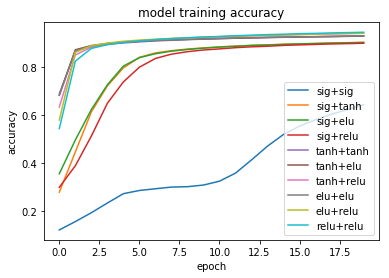

In [40]:
plt.plot(model_best_20.history["acc"])
plt.plot(model_s_t_m_20.history["acc"])
plt.plot(model_s_e_m_20.history["acc"])
plt.plot(model_s_r_m_20.history["acc"])
plt.plot(model_t_t_m_20.history["acc"])
plt.plot(model_t_e_m_20.history["acc"])
plt.plot(model_t_r_m_20.history["acc"])
plt.plot(model_e_e_m_20.history["acc"])
plt.plot(model_e_r_m_20.history["acc"])
plt.plot(model_r_r_m_20.history["acc"])
         
plt.title("model training accuracy")
plt.ylabel("accuracy")
plt.xlabel("epoch")
plt.legend(["sig+sig","sig+tanh","sig+elu","sig+relu","tanh+tanh","tanh+elu","tanh+relu","elu+elu","elu+relu","relu+relu"], loc = 'best')
plt.show()

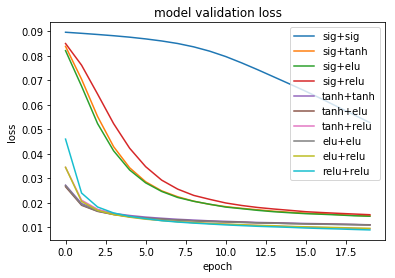

In [42]:
plt.plot(model_best_20.history["val_loss"])
plt.plot(model_s_t_m_20.history["val_loss"])
plt.plot(model_s_e_m_20.history["val_loss"])
plt.plot(model_s_r_m_20.history["val_loss"])
plt.plot(model_t_t_m_20.history["val_loss"])
plt.plot(model_t_e_m_20.history["val_loss"])
plt.plot(model_t_r_m_20.history["val_loss"])
plt.plot(model_e_e_m_20.history["val_loss"])
plt.plot(model_e_r_m_20.history["val_loss"])
plt.plot(model_r_r_m_20.history["val_loss"])
         
plt.title("model validation loss")
plt.ylabel("loss")
plt.xlabel("epoch")
plt.legend(["sig+sig","sig+tanh","sig+elu","sig+relu","tanh+tanh","tanh+elu","tanh+relu","elu+elu","elu+relu","relu+relu"], loc = 'best')
plt.show()

## 同理，我們可以對於不同的loss function 也做

## loss function 為binary_crossentropy

In [45]:
model_s_s_b = Sequential()
model_s_s_b.add(Dense(650, input_dim = 784))
model_s_s_b.add(Activation('sigmoid'))
model_s_s_b.add(Dense(350))
model_s_s_b.add(Activation('sigmoid'))
model_s_s_b.add(Dense(10))
model_s_s_b.add(Activation('softmax'))
model_s_s_b.compile(loss = 'binary_crossentropy', optimizer=SGD(lr = 0.087), metrics=['accuracy'])
model_s_s_b.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_721 (Dense)            (None, 650)               510250    
_________________________________________________________________
activation_721 (Activation)  (None, 650)               0         
_________________________________________________________________
dense_722 (Dense)            (None, 350)               227850    
_________________________________________________________________
activation_722 (Activation)  (None, 350)               0         
_________________________________________________________________
dense_723 (Dense)            (None, 10)                3510      
_________________________________________________________________
activation_723 (Activation)  (None, 10)                0         
Total params: 741,610
Trainable params: 741,610
Non-trainable params: 0
_________________________________________________________________


In [46]:
model_s_s_b_20 = model_s_s_b.fit(x_train_reg, y_train,
                         batch_size = 100,
                         epochs = 20,
                         verbose = 1,
                         validation_data = (x_test_reg, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 14s 226us/step - loss: 0.3195 - acc: 0.9000 - val_loss: 0.3127 - val_acc: 0.9000
Epoch 2/20
60000/60000 [==============================] - 9s 154us/step - loss: 0.3050 - acc: 0.9000 - val_loss: 0.2944 - val_acc: 0.9000
Epoch 3/20
60000/60000 [==============================] - 9s 151us/step - loss: 0.2813 - acc: 0.9000 - val_loss: 0.2629 - val_acc: 0.9002
Epoch 4/20
60000/60000 [==============================] - 9s 155us/step - loss: 0.2431 - acc: 0.9043 - val_loss: 0.2190 - val_acc: 0.9113
Epoch 5/20
60000/60000 [==============================] - 10s 159us/step - loss: 0.1995 - acc: 0.9194 - val_loss: 0.1772 - val_acc: 0.9280
Epoch 6/20
60000/60000 [==============================] - 9s 155us/step - loss: 0.1633 - acc: 0.9351 - val_loss: 0.1465 - val_acc: 0.9430
Epoch 7/20
60000/60000 [==============================] - 9s 156us/step - loss: 0.1372 - acc: 0.9465 - val_loss: 0.1248 

In [47]:
model_s_t_b = Sequential()
model_s_t_b.add(Dense(650, input_dim = 784))
model_s_t_b.add(Activation('sigmoid'))
model_s_t_b.add(Dense(350))
model_s_t_b.add(Activation('tanh'))
model_s_t_b.add(Dense(10))
model_s_t_b.add(Activation('softmax'))
model_s_t_b.compile(loss = 'binary_crossentropy', optimizer=SGD(lr = 0.087), metrics=['accuracy'])
model_s_t_b.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_724 (Dense)            (None, 650)               510250    
_________________________________________________________________
activation_724 (Activation)  (None, 650)               0         
_________________________________________________________________
dense_725 (Dense)            (None, 350)               227850    
_________________________________________________________________
activation_725 (Activation)  (None, 350)               0         
_________________________________________________________________
dense_726 (Dense)            (None, 10)                3510      
_________________________________________________________________
activation_726 (Activation)  (None, 10)                0         
Total params: 741,610
Trainable params: 741,610
Non-trainable params: 0
_________________________________________________________________


In [48]:
model_s_t_b_20 = model_s_t_b.fit(x_train_reg, y_train,
                         batch_size = 100,
                         epochs = 20,
                         verbose = 1,
                         validation_data = (x_test_reg, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 14s 234us/step - loss: 0.2426 - acc: 0.9097 - val_loss: 0.1579 - val_acc: 0.9352
Epoch 2/20
60000/60000 [==============================] - 10s 165us/step - loss: 0.1204 - acc: 0.9572 - val_loss: 0.0923 - val_acc: 0.9714
Epoch 3/20
60000/60000 [==============================] - 10s 164us/step - loss: 0.0841 - acc: 0.9732 - val_loss: 0.0729 - val_acc: 0.9773
Epoch 4/20
60000/60000 [==============================] - 10s 166us/step - loss: 0.0713 - acc: 0.9770 - val_loss: 0.0643 - val_acc: 0.9794
Epoch 5/20
60000/60000 [==============================] - 10s 168us/step - loss: 0.0650 - acc: 0.9787 - val_loss: 0.0601 - val_acc: 0.9806
Epoch 6/20
60000/60000 [==============================] - 10s 167us/step - loss: 0.0612 - acc: 0.9798 - val_loss: 0.0569 - val_acc: 0.9815
Epoch 7/20
60000/60000 [==============================] - 10s 167us/step - loss: 0.0586 - acc: 0.9806 - val_loss: 0.

In [49]:
model_s_e_b = Sequential()
model_s_e_b.add(Dense(650, input_dim = 784))
model_s_e_b.add(Activation('sigmoid'))
model_s_e_b.add(Dense(350))
model_s_e_b.add(Activation('elu'))
model_s_e_b.add(Dense(10))
model_s_e_b.add(Activation('softmax'))
model_s_e_b.compile(loss = 'binary_crossentropy', optimizer=SGD(lr = 0.087), metrics=['accuracy'])
model_s_e_b.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_727 (Dense)            (None, 650)               510250    
_________________________________________________________________
activation_727 (Activation)  (None, 650)               0         
_________________________________________________________________
dense_728 (Dense)            (None, 350)               227850    
_________________________________________________________________
activation_728 (Activation)  (None, 350)               0         
_________________________________________________________________
dense_729 (Dense)            (None, 10)                3510      
_________________________________________________________________
activation_729 (Activation)  (None, 10)                0         
Total params: 741,610
Trainable params: 741,610
Non-trainable params: 0
_________________________________________________________________


In [50]:
model_s_e_b_20 = model_s_e_b.fit(x_train_reg, y_train,
                         batch_size = 100,
                         epochs = 20,
                         verbose = 1,
                         validation_data = (x_test_reg, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 14s 233us/step - loss: 0.2450 - acc: 0.9090 - val_loss: 0.1601 - val_acc: 0.9367
Epoch 2/20
60000/60000 [==============================] - 10s 169us/step - loss: 0.1221 - acc: 0.9559 - val_loss: 0.0930 - val_acc: 0.9713
Epoch 3/20
60000/60000 [==============================] - 10s 165us/step - loss: 0.0847 - acc: 0.9732 - val_loss: 0.0731 - val_acc: 0.9770
Epoch 4/20
60000/60000 [==============================] - 10s 171us/step - loss: 0.0714 - acc: 0.9770 - val_loss: 0.0644 - val_acc: 0.9792
Epoch 5/20
60000/60000 [==============================] - 10s 168us/step - loss: 0.0650 - acc: 0.9788 - val_loss: 0.0591 - val_acc: 0.9808
Epoch 6/20
60000/60000 [==============================] - 10s 165us/step - loss: 0.0610 - acc: 0.9799 - val_loss: 0.0563 - val_acc: 0.9816
Epoch 7/20
60000/60000 [==============================] - 10s 167us/step - loss: 0.0584 - acc: 0.9808 - val_loss: 0.

In [51]:
model_s_r_b = Sequential()
model_s_r_b.add(Dense(650, input_dim = 784))
model_s_r_b.add(Activation('sigmoid'))
model_s_r_b.add(Dense(350))
model_s_r_b.add(Activation('relu'))
model_s_r_b.add(Dense(10))
model_s_r_b.add(Activation('softmax'))
model_s_r_b.compile(loss = 'binary_crossentropy', optimizer=SGD(lr = 0.087), metrics=['accuracy'])
model_s_r_b.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_730 (Dense)            (None, 650)               510250    
_________________________________________________________________
activation_730 (Activation)  (None, 650)               0         
_________________________________________________________________
dense_731 (Dense)            (None, 350)               227850    
_________________________________________________________________
activation_731 (Activation)  (None, 350)               0         
_________________________________________________________________
dense_732 (Dense)            (None, 10)                3510      
_________________________________________________________________
activation_732 (Activation)  (None, 10)                0         
Total params: 741,610
Trainable params: 741,610
Non-trainable params: 0
_________________________________________________________________


In [52]:
model_s_r_b_20 = model_s_r_b.fit(x_train_reg, y_train,
                         batch_size = 100,
                         epochs = 20,
                         verbose = 1,
                         validation_data = (x_test_reg, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 14s 237us/step - loss: 0.2627 - acc: 0.9041 - val_loss: 0.1878 - val_acc: 0.9239
Epoch 2/20
60000/60000 [==============================] - 10s 170us/step - loss: 0.1401 - acc: 0.9468 - val_loss: 0.1049 - val_acc: 0.9655
Epoch 3/20
60000/60000 [==============================] - 10s 168us/step - loss: 0.0928 - acc: 0.9697 - val_loss: 0.0797 - val_acc: 0.9745
Epoch 4/20
60000/60000 [==============================] - 10s 165us/step - loss: 0.0759 - acc: 0.9756 - val_loss: 0.0685 - val_acc: 0.9785
Epoch 5/20
60000/60000 [==============================] - 10s 167us/step - loss: 0.0677 - acc: 0.9779 - val_loss: 0.0613 - val_acc: 0.9802
Epoch 6/20
60000/60000 [==============================] - 10s 169us/step - loss: 0.0630 - acc: 0.9794 - val_loss: 0.0580 - val_acc: 0.9814
Epoch 7/20
60000/60000 [==============================] - 10s 167us/step - loss: 0.0597 - acc: 0.9804 - val_loss: 0.

In [53]:
model_t_t_b = Sequential()
model_t_t_b.add(Dense(650, input_dim = 784))
model_t_t_b.add(Activation('tanh'))
model_t_t_b.add(Dense(350))
model_t_t_b.add(Activation('tanh'))
model_t_t_b.add(Dense(10))
model_t_t_b.add(Activation('softmax'))
model_t_t_b.compile(loss = 'binary_crossentropy', optimizer=SGD(lr = 0.087), metrics=['accuracy'])
model_t_t_b.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_733 (Dense)            (None, 650)               510250    
_________________________________________________________________
activation_733 (Activation)  (None, 650)               0         
_________________________________________________________________
dense_734 (Dense)            (None, 350)               227850    
_________________________________________________________________
activation_734 (Activation)  (None, 350)               0         
_________________________________________________________________
dense_735 (Dense)            (None, 10)                3510      
_________________________________________________________________
activation_735 (Activation)  (None, 10)                0         
Total params: 741,610
Trainable params: 741,610
Non-trainable params: 0
_________________________________________________________________


In [54]:
model_t_t_b_20 = model_t_t_b.fit(x_train_reg, y_train,
                         batch_size = 100,
                         epochs = 20,
                         verbose = 1,
                         validation_data = (x_test_reg, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 15s 254us/step - loss: 0.1077 - acc: 0.9630 - val_loss: 0.0640 - val_acc: 0.9796
Epoch 2/20
60000/60000 [==============================] - 12s 194us/step - loss: 0.0607 - acc: 0.9804 - val_loss: 0.0534 - val_acc: 0.9828
Epoch 3/20
60000/60000 [==============================] - 11s 187us/step - loss: 0.0537 - acc: 0.9824 - val_loss: 0.0492 - val_acc: 0.9840
Epoch 4/20
60000/60000 [==============================] - 11s 191us/step - loss: 0.0501 - acc: 0.9836 - val_loss: 0.0467 - val_acc: 0.9851
Epoch 5/20
60000/60000 [==============================] - 12s 195us/step - loss: 0.0475 - acc: 0.9845 - val_loss: 0.0449 - val_acc: 0.9857
Epoch 6/20
60000/60000 [==============================] - 12s 202us/step - loss: 0.0455 - acc: 0.9853 - val_loss: 0.0432 - val_acc: 0.9863
Epoch 7/20
60000/60000 [==============================] - 11s 190us/step - loss: 0.0437 - acc: 0.9859 - val_loss: 0.

In [55]:
model_t_e_b = Sequential()
model_t_e_b.add(Dense(650, input_dim = 784))
model_t_e_b.add(Activation('tanh'))
model_t_e_b.add(Dense(350))
model_t_e_b.add(Activation('elu'))
model_t_e_b.add(Dense(10))
model_t_e_b.add(Activation('softmax'))
model_t_e_b.compile(loss = 'binary_crossentropy', optimizer=SGD(lr = 0.087), metrics=['accuracy'])
model_t_e_b.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_736 (Dense)            (None, 650)               510250    
_________________________________________________________________
activation_736 (Activation)  (None, 650)               0         
_________________________________________________________________
dense_737 (Dense)            (None, 350)               227850    
_________________________________________________________________
activation_737 (Activation)  (None, 350)               0         
_________________________________________________________________
dense_738 (Dense)            (None, 10)                3510      
_________________________________________________________________
activation_738 (Activation)  (None, 10)                0         
Total params: 741,610
Trainable params: 741,610
Non-trainable params: 0
_________________________________________________________________


In [56]:
model_t_e_b_20 = model_t_e_b.fit(x_train_reg, y_train,
                         batch_size = 100,
                         epochs = 20,
                         verbose = 1,
                         validation_data = (x_test_reg, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 14s 233us/step - loss: 0.1058 - acc: 0.9637 - val_loss: 0.0620 - val_acc: 0.9806
Epoch 2/20
60000/60000 [==============================] - 10s 165us/step - loss: 0.0595 - acc: 0.9808 - val_loss: 0.0528 - val_acc: 0.9831
Epoch 3/20
60000/60000 [==============================] - 10s 166us/step - loss: 0.0531 - acc: 0.9826 - val_loss: 0.0489 - val_acc: 0.9842
Epoch 4/20
60000/60000 [==============================] - 10s 166us/step - loss: 0.0497 - acc: 0.9838 - val_loss: 0.0465 - val_acc: 0.9850
Epoch 5/20
60000/60000 [==============================] - 10s 165us/step - loss: 0.0473 - acc: 0.9846 - val_loss: 0.0450 - val_acc: 0.9855
Epoch 6/20
60000/60000 [==============================] - 10s 167us/step - loss: 0.0455 - acc: 0.9853 - val_loss: 0.0438 - val_acc: 0.9858
Epoch 7/20
60000/60000 [==============================] - 10s 166us/step - loss: 0.0439 - acc: 0.9858 - val_loss: 0.

In [57]:
model_t_r_b = Sequential()
model_t_r_b.add(Dense(650, input_dim = 784))
model_t_r_b.add(Activation('tanh'))
model_t_r_b.add(Dense(350))
model_t_r_b.add(Activation('relu'))
model_t_r_b.add(Dense(10))
model_t_r_b.add(Activation('softmax'))
model_t_r_b.compile(loss = 'binary_crossentropy', optimizer=SGD(lr = 0.087), metrics=['accuracy'])
model_t_r_b.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_739 (Dense)            (None, 650)               510250    
_________________________________________________________________
activation_739 (Activation)  (None, 650)               0         
_________________________________________________________________
dense_740 (Dense)            (None, 350)               227850    
_________________________________________________________________
activation_740 (Activation)  (None, 350)               0         
_________________________________________________________________
dense_741 (Dense)            (None, 10)                3510      
_________________________________________________________________
activation_741 (Activation)  (None, 10)                0         
Total params: 741,610
Trainable params: 741,610
Non-trainable params: 0
_________________________________________________________________


In [58]:
model_t_r_b_20 = model_t_r_b.fit(x_train_reg, y_train,
                         batch_size = 100,
                         epochs = 20,
                         verbose = 1,
                         validation_data = (x_test_reg, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 14s 230us/step - loss: 0.1211 - acc: 0.9576 - val_loss: 0.0644 - val_acc: 0.9795
Epoch 2/20
60000/60000 [==============================] - 10s 161us/step - loss: 0.0592 - acc: 0.9810 - val_loss: 0.0509 - val_acc: 0.9836
Epoch 3/20
60000/60000 [==============================] - 10s 159us/step - loss: 0.0504 - acc: 0.9836 - val_loss: 0.0455 - val_acc: 0.9853
Epoch 4/20
60000/60000 [==============================] - 9s 158us/step - loss: 0.0456 - acc: 0.9852 - val_loss: 0.0423 - val_acc: 0.9864
Epoch 5/20
60000/60000 [==============================] - 10s 161us/step - loss: 0.0421 - acc: 0.9863 - val_loss: 0.0396 - val_acc: 0.9872
Epoch 6/20
60000/60000 [==============================] - 10s 163us/step - loss: 0.0393 - acc: 0.9874 - val_loss: 0.0371 - val_acc: 0.9879
Epoch 7/20
60000/60000 [==============================] - 9s 156us/step - loss: 0.0368 - acc: 0.9882 - val_loss: 0.03

In [59]:
model_e_e_b = Sequential()
model_e_e_b.add(Dense(650, input_dim = 784))
model_e_e_b.add(Activation('elu'))
model_e_e_b.add(Dense(350))
model_e_e_b.add(Activation('elu'))
model_e_e_b.add(Dense(10))
model_e_e_b.add(Activation('softmax'))
model_e_e_b.compile(loss = 'binary_crossentropy', optimizer=SGD(lr = 0.087), metrics=['accuracy'])
model_e_e_b.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_742 (Dense)            (None, 650)               510250    
_________________________________________________________________
activation_742 (Activation)  (None, 650)               0         
_________________________________________________________________
dense_743 (Dense)            (None, 350)               227850    
_________________________________________________________________
activation_743 (Activation)  (None, 350)               0         
_________________________________________________________________
dense_744 (Dense)            (None, 10)                3510      
_________________________________________________________________
activation_744 (Activation)  (None, 10)                0         
Total params: 741,610
Trainable params: 741,610
Non-trainable params: 0
_________________________________________________________________


In [60]:
model_e_e_b_20 = model_e_e_b.fit(x_train_reg, y_train,
                         batch_size = 100,
                         epochs = 20,
                         verbose = 1,
                         validation_data = (x_test_reg, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 14s 230us/step - loss: 0.1078 - acc: 0.9631 - val_loss: 0.0625 - val_acc: 0.9800
Epoch 2/20
60000/60000 [==============================] - 9s 158us/step - loss: 0.0599 - acc: 0.9806 - val_loss: 0.0525 - val_acc: 0.9831
Epoch 3/20
60000/60000 [==============================] - 9s 158us/step - loss: 0.0534 - acc: 0.9827 - val_loss: 0.0490 - val_acc: 0.9842
Epoch 4/20
60000/60000 [==============================] - 9s 157us/step - loss: 0.0499 - acc: 0.9838 - val_loss: 0.0465 - val_acc: 0.9851
Epoch 5/20
60000/60000 [==============================] - 10s 159us/step - loss: 0.0476 - acc: 0.9846 - val_loss: 0.0449 - val_acc: 0.9856
Epoch 6/20
60000/60000 [==============================] - 10s 162us/step - loss: 0.0458 - acc: 0.9853 - val_loss: 0.0433 - val_acc: 0.9864
Epoch 7/20
60000/60000 [==============================] - 9s 157us/step - loss: 0.0441 - acc: 0.9858 - val_loss: 0.0427

In [61]:
model_e_r_b = Sequential()
model_e_r_b.add(Dense(650, input_dim = 784))
model_e_r_b.add(Activation('elu'))
model_e_r_b.add(Dense(350))
model_e_r_b.add(Activation('relu'))
model_e_r_b.add(Dense(10))
model_e_r_b.add(Activation('softmax'))
model_e_r_b.compile(loss = 'binary_crossentropy', optimizer=SGD(lr = 0.087), metrics=['accuracy'])
model_e_r_b.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_745 (Dense)            (None, 650)               510250    
_________________________________________________________________
activation_745 (Activation)  (None, 650)               0         
_________________________________________________________________
dense_746 (Dense)            (None, 350)               227850    
_________________________________________________________________
activation_746 (Activation)  (None, 350)               0         
_________________________________________________________________
dense_747 (Dense)            (None, 10)                3510      
_________________________________________________________________
activation_747 (Activation)  (None, 10)                0         
Total params: 741,610
Trainable params: 741,610
Non-trainable params: 0
_________________________________________________________________


In [62]:
model_e_r_b_20 = model_e_r_b.fit(x_train_reg, y_train,
                         batch_size = 100,
                         epochs = 20,
                         verbose = 1,
                         validation_data = (x_test_reg, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 14s 236us/step - loss: 0.1194 - acc: 0.9581 - val_loss: 0.0634 - val_acc: 0.9802
Epoch 2/20
60000/60000 [==============================] - 10s 162us/step - loss: 0.0589 - acc: 0.9809 - val_loss: 0.0504 - val_acc: 0.9838
Epoch 3/20
60000/60000 [==============================] - 10s 163us/step - loss: 0.0501 - acc: 0.9837 - val_loss: 0.0452 - val_acc: 0.9854
Epoch 4/20
60000/60000 [==============================] - 10s 159us/step - loss: 0.0452 - acc: 0.9854 - val_loss: 0.0414 - val_acc: 0.9867
Epoch 5/20
60000/60000 [==============================] - 10s 161us/step - loss: 0.0415 - acc: 0.9865 - val_loss: 0.0385 - val_acc: 0.9877
Epoch 6/20
60000/60000 [==============================] - 10s 162us/step - loss: 0.0386 - acc: 0.9877 - val_loss: 0.0367 - val_acc: 0.9882
Epoch 7/20
60000/60000 [==============================] - 10s 159us/step - loss: 0.0361 - acc: 0.9884 - val_loss: 0.

In [63]:
model_r_r_b = Sequential()
model_r_r_b.add(Dense(650, input_dim = 784))
model_r_r_b.add(Activation('relu'))
model_r_r_b.add(Dense(350))
model_r_r_b.add(Activation('relu'))
model_r_r_b.add(Dense(10))
model_r_r_b.add(Activation('softmax'))
model_r_r_b.compile(loss = 'binary_crossentropy', optimizer=SGD(lr = 0.087), metrics=['accuracy'])
model_r_r_b.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_748 (Dense)            (None, 650)               510250    
_________________________________________________________________
activation_748 (Activation)  (None, 650)               0         
_________________________________________________________________
dense_749 (Dense)            (None, 350)               227850    
_________________________________________________________________
activation_749 (Activation)  (None, 350)               0         
_________________________________________________________________
dense_750 (Dense)            (None, 10)                3510      
_________________________________________________________________
activation_750 (Activation)  (None, 10)                0         
Total params: 741,610
Trainable params: 741,610
Non-trainable params: 0
_________________________________________________________________


In [64]:
model_r_r_b_20 = model_r_r_b.fit(x_train_reg, y_train,
                         batch_size = 100,
                         epochs = 20,
                         verbose = 1,
                         validation_data = (x_test_reg, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 14s 228us/step - loss: 0.1388 - acc: 0.9507 - val_loss: 0.0654 - val_acc: 0.9796
Epoch 2/20
60000/60000 [==============================] - 9s 156us/step - loss: 0.0595 - acc: 0.9809 - val_loss: 0.0502 - val_acc: 0.9839
Epoch 3/20
60000/60000 [==============================] - 9s 157us/step - loss: 0.0493 - acc: 0.9841 - val_loss: 0.0439 - val_acc: 0.9860
Epoch 4/20
60000/60000 [==============================] - 10s 161us/step - loss: 0.0437 - acc: 0.9860 - val_loss: 0.0397 - val_acc: 0.9874
Epoch 5/20
60000/60000 [==============================] - 10s 158us/step - loss: 0.0398 - acc: 0.9873 - val_loss: 0.0369 - val_acc: 0.9881
Epoch 6/20
60000/60000 [==============================] - 10s 159us/step - loss: 0.0365 - acc: 0.9883 - val_loss: 0.0342 - val_acc: 0.9888
Epoch 7/20
60000/60000 [==============================] - 9s 157us/step - loss: 0.0339 - acc: 0.9892 - val_loss: 0.032

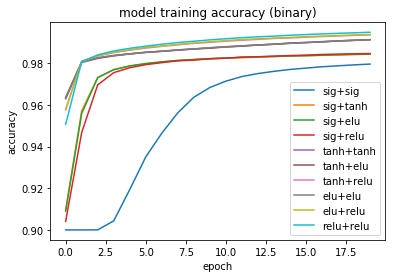

In [65]:
plt.plot(model_s_s_b_20.history["acc"])
plt.plot(model_s_t_b_20.history["acc"])
plt.plot(model_s_e_b_20.history["acc"])
plt.plot(model_s_r_b_20.history["acc"])
plt.plot(model_t_t_b_20.history["acc"])
plt.plot(model_t_e_b_20.history["acc"])
plt.plot(model_t_r_b_20.history["acc"])
plt.plot(model_e_e_b_20.history["acc"])
plt.plot(model_e_r_b_20.history["acc"])
plt.plot(model_r_r_b_20.history["acc"])
         
plt.title("model training accuracy (binary)")
plt.ylabel("accuracy")
plt.xlabel("epoch")
plt.legend(["sig+sig","sig+tanh","sig+elu","sig+relu","tanh+tanh","tanh+elu","tanh+relu","elu+elu","elu+relu","relu+relu"], loc = 'best')
plt.show()

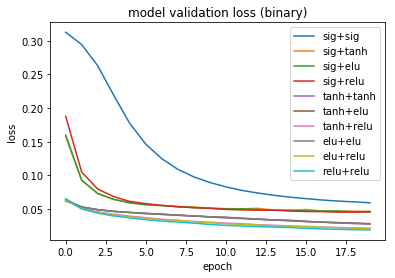

In [66]:
plt.plot(model_s_s_b_20.history["val_loss"])
plt.plot(model_s_t_b_20.history["val_loss"])
plt.plot(model_s_e_b_20.history["val_loss"])
plt.plot(model_s_r_b_20.history["val_loss"])
plt.plot(model_t_t_b_20.history["val_loss"])
plt.plot(model_t_e_b_20.history["val_loss"])
plt.plot(model_t_r_b_20.history["val_loss"])
plt.plot(model_e_e_b_20.history["val_loss"])
plt.plot(model_e_r_b_20.history["val_loss"])
plt.plot(model_r_r_b_20.history["val_loss"])
         
plt.title("model validation loss (binary)")
plt.ylabel("loss")
plt.xlabel("epoch")
plt.legend(["sig+sig","sig+tanh","sig+elu","sig+relu","tanh+tanh","tanh+elu","tanh+relu","elu+elu","elu+relu","relu+relu"], loc = 'best')
plt.show()

## 以loss function 為binary cross entropy來看，跟mse的情況類似，activation function選sigmoid普遍來說一開始的學習率較其他方法差，尤其以sigmoid+sigmoid最差，而其他的activation function表現得都算良好。但是，每一個方法的初始準確率都達到了$90\%$以上！而在所有方法中以relu+relu最佳，準確率達到了$99.37\%$！